# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/root/airbnb.csv')
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [9]:
print(data.columns)

Index(['Host Id', 'Host Since', 'Name', 'Review Scores Rating (bin)',
       'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating', 'Neighbourhood_Brooklyn',
       'Neighbourhood_Manhattan', 'Neighbourhood_Queens',
       'Neighbourhood_Staten Island', 'Property Type_Bed & Breakfast',
       'Property Type_Boat', 'Property Type_Bungalow', 'Property Type_Cabin',
       'Property Type_Camper/RV', 'Property Type_Castle',
       'Property Type_Chalet', 'Property Type_Condominium',
       'Property Type_Dorm', 'Property Type_House', 'Property Type_Hut',
       'Property Type_Lighthouse', 'Property Type_Loft', 'Property Type_Other',
       'Property Type_Tent', 'Property Type_Townhouse',
       'Property Type_Treehouse', 'Property Type_Villa',
       'Room Type_Private room', 'Room Type_Shared room'],
      dtype='object')


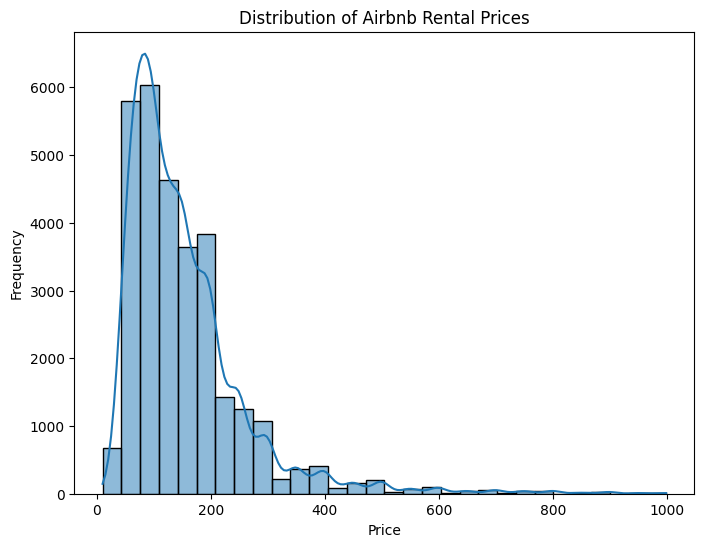

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], kde=True, bins=30)
plt.title('Distribution of Airbnb Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [11]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

avg_price_per_category = data.groupby('Property Type')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_price_per_category.plot(kind='bar', color='skyblue')
plt.title('Average Airbnb Rental Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

KeyError: 'Property Type'

In [6]:
data = pd.get_dummies(data, drop_first=True)

In [7]:
data.dtypes

,0
Host Id,int64
Review Scores Rating (bin),float64
Zipcode,float64
Beds,float64
Number of Records,int64
...,...
Property Type_Townhouse,bool
Property Type_Treehouse,bool
Property Type_Villa,bool
Room Type_Private room,bool


In [8]:
data.head()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Host Since_1/1/2012,Host Since_1/1/2013,...,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Tent,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Room Type_Private room,Room Type_Shared room
0,5162530,NaN,11249.0,1.0,1,0,145.0,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
1,33134899,NaN,11206.0,1.0,1,1,37.0,NaN,False,False,...,False,False,False,False,False,False,False,False,True,False
2,39608626,NaN,10032.0,1.0,1,1,28.0,NaN,False,False,...,False,False,False,False,False,False,False,False,True,False
3,500,NaN,10024.0,3.0,1,0,199.0,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
4,500,95.0,10036.0,3.0,1,39,549.0,96.0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Redefine features and target variable to ensure no issues in the split and model fitting
X = data.drop(columns=['Price'])
y = data['Price']

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Predictions and evaluations on train and test sets
y_train_pred = simple_model.predict(X_train)
y_test_pred = simple_model.predict(X_test)

# Calculate RMSE and R^2 for the simple model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse, test_rmse, train_r2, test_r2
